In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [2]:
# import data
df = pd.read_csv('Dopamine D2 receptor.csv', delimiter=";")

### EDA

In [8]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL4069145,NaN,0,423.52,0,3.13,16a,COc1ccccc1N1CCN(CCCCOc2ccc3c(/C=N/O)cnn3c2)CC1,EC50,'=',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4007455,1,Scientific Literature,J Med Chem,2017,None,NaN
1,CHEMBL3394274,NaN,0,245.33,0,0.63,39a,O=C1Cc2c(CCN3CCNCC3)cccc2N1,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
2,CHEMBL3394264,NaN,0,447.50,0,1.83,32a,CN(CCCNc1nc(N)n2nc(-c3ccco3)nc2n1)CCc1cccc2c1C...,EC50,'=',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
3,CHEMBL3287395,NaN,0,491.42,0,4.80,6f,CCOC(=O)c1cc2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)...,EC50,'=',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286313,1,Scientific Literature,J. Med. Chem.,2014,CHEMBL3307715,NaN
4,CHEMBL59,DOPAMINE,4,153.18,0,0.60,Dopamine,NCCc1ccc(O)c(O)c1,EC50,'=',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286313,1,Scientific Literature,J. Med. Chem.,2014,CHEMBL3307715,NaN


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          1608 non-null   object 
 1   Molecule Name               207 non-null    object 
 2   Molecule Max Phase          1608 non-null   int64  
 3   Molecular Weight            1608 non-null   float64
 4   #RO5 Violations             1608 non-null   object 
 5   AlogP                       1608 non-null   object 
 6   Compound Key                1608 non-null   object 
 7   Smiles                      1608 non-null   object 
 8   Standard Type               1608 non-null   object 
 9   Standard Relation           1403 non-null   object 
 10  Standard Value              1403 non-null   float64
 11  Standard Units              1394 non-null   object 
 12  pChEMBL Value               1141 non-null   float64
 13  Data Validity Comment       12 no

**Data cleansing**

In [3]:
# check for duplicate
duplicate = df[df.duplicated(keep = False)]
duplicate

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
1,CHEMBL3394274,NaN,0,245.33,0,0.63,39a,O=C1Cc2c(CCN3CCNCC3)cccc2N1,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
5,CHEMBL3394261,NaN,0,535.96,2,2.48,23,Nc1nc(NCCc2ccc(Oc3nc(Cl)nc(N4CCOCC4)n3)cc2)nc2...,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
52,CHEMBL4579687,NaN,0,374.28,0,4.22,(R)-4,COc1ccc2c(c1OC)-c1ccc(Br)c3c1[C@@H](C2)N(C)CC3,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4342494,1,Scientific Literature,ACS Med Chem Lett,2020,None,NaN
82,CHEMBL3394271,NaN,0,459.51,0,1.98,37,Nc1nc(NC2CCN(CCc3cccc4c3CC(=O)N4)CC2)nc2nc(-c3...,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
89,CHEMBL3394272,NaN,0,345.44,0,2.28,38a,CC(C)(C)OC(=O)N1CCN(CCc2cccc3c2CC(=O)N3)CC1,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,CHEMBL4513262,NaN,0,374.28,0,4.22,(S)-4,COc1ccc2c(c1OC)-c1ccc(Br)c3c1[C@H](C2)N(C)CC3,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4342494,1,Scientific Literature,ACS Med Chem Lett,2020,None,NaN
1473,CHEMBL35426,NaN,0,279.34,0,3.17,14,CN1CCc2cccc3c2[C@H]1Cc1ccc2c(c1-3)OCO2,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4342494,1,Scientific Literature,ACS Med Chem Lett,2020,None,NaN
1478,CHEMBL3394273,NaN,0,359.47,0,2.67,38b,CC(C)(C)OC(=O)N1CCCN(CCc2cccc3c2CC(=O)N3)CC1,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
1520,CHEMBL4438800,NaN,0,430.30,0,4.05,7,CC(=O)Oc1c(Br)cc2c(c1OC(C)=O)-c1cccc3c1[C@@H](...,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4342494,1,Scientific Literature,ACS Med Chem Lett,2020,None,NaN


In [12]:
# double check duplicates
df.loc[(df['Molecule ChEMBL ID'] == 'CHEMBL3394274')]

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
1,CHEMBL3394274,NaN,0,245.33,0,0.63,39a,O=C1Cc2c(CCN3CCNCC3)cccc2N1,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN
1209,CHEMBL3394274,NaN,0,245.33,0,0.63,39a,O=C1Cc2c(CCN3CCNCC3)cccc2N1,EC50,'>',...,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072,NaN


In [13]:
# replace the duplicates
df.drop_duplicates(inplace = True)

Molecule ChEMBL ID - 0%
Molecule Name - 87%
Molecule Max Phase - 0%
Molecular Weight - 0%
#RO5 Violations - 0%
AlogP - 0%
Compound Key - 0%
Smiles - 0%
Standard Type - 0%
Standard Relation - 13%
Standard Value - 13%
Standard Units - 13%
pChEMBL Value - 28%
Data Validity Comment - 99%
Comment - 82%
Uo Units - 13%
Ligand Efficiency BEI - 54%
Ligand Efficiency LE - 54%
Ligand Efficiency LLE - 54%
Ligand Efficiency SEI - 54%
Potential Duplicate - 0%
Assay ChEMBL ID - 0%
Assay Description - 0%
Assay Type - 0%
BAO Format ID - 0%
BAO Label - 0%
Assay Organism - 0%
Assay Tissue ChEMBL ID - 0%
Assay Tissue Name - 0%
Assay Cell Type - 0%
Assay Subcellular Fraction - 0%
Assay Parameters - 100%
Assay Variant Accession - 100%
Assay Variant Mutation - 100%
Target ChEMBL ID - 0%
Target Name - 0%
Target Organism - 0%
Target Type - 0%
Document ChEMBL ID - 0%
Source ID - 0%
Source Description - 0%
Document Journal - 5%
Document Year - 0%
Cell ChEMBL ID - 0%
Properties - 100%


<AxesSubplot:>

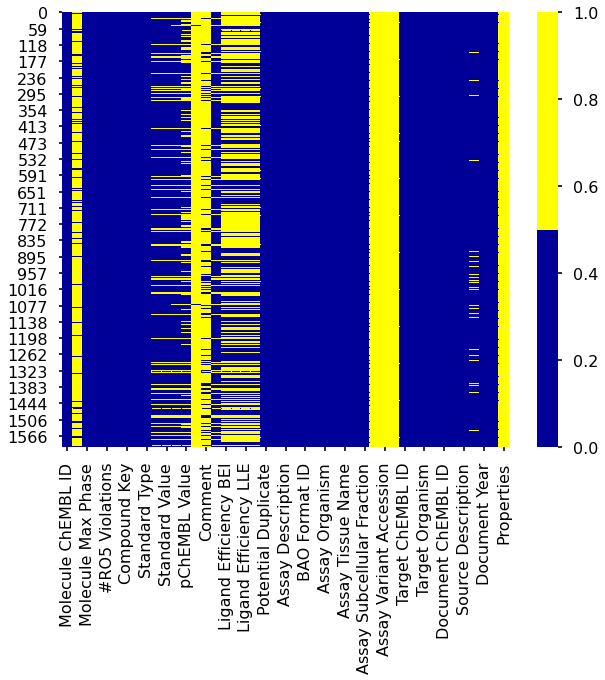

In [20]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

cols = df.columns[:45]
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [21]:
# drop unimportant Feature
cols_to_drop = ['Molecule Name', 'Data Validity Comment', 'Comment', 'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation', 'Properties']
df = df.drop(cols_to_drop, axis=1)

In [22]:
# replace unnecessary data
df['Molecule ChEMBL ID'] = df['Molecule ChEMBL ID'].apply(lambda x:x[6:]).tolist()
df['Target ChEMBL ID'] = df['Target ChEMBL ID'].apply(lambda x:x[6:]).tolist()

In [23]:
# drop NA value
df.dropna(subset=['pChEMBL Value'],inplace=True)

There is 26 outliers
There is 2.28% outliers


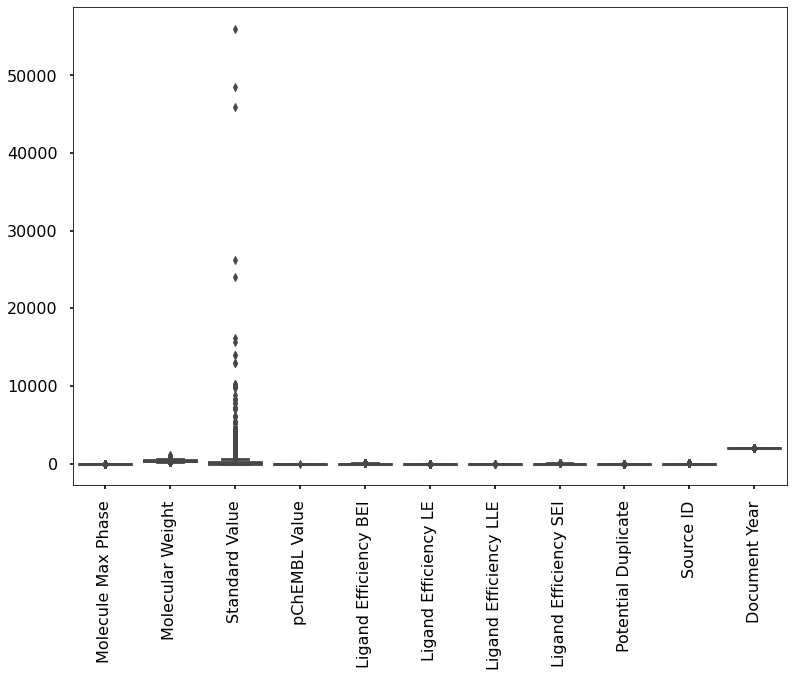

In [24]:
# check the outliers
sns.boxplot(data=df)
plt.xticks(rotation=90);
outlist=['Standard Value']
outrange = pd.DataFrame(index=['lower','upper'])
for each in outlist:
    mean = np.mean(df[each])
    std = np.std(df[each])
    lower_range=mean-2*std
    upper_range=mean+2*std
    outrange[each]=[lower_range,upper_range]
outrange
filter1 = (df['Standard Value'] > outrange['Standard Value'][1])
filter2 = (df['Standard Value'] < outrange['Standard Value'][0])
Outlier_filter = (filter1 | filter2)
df_outliers= df[Outlier_filter]
df_outliers['Standard Value'].value_counts()
print("There is {} outliers".format(df[Outlier_filter]["Standard Value"].count()))
print('There is {}% outliers'.format(round(len(df[Outlier_filter]["Standard Value"])/len(df['Standard Value'])*100,2)))
df=df[~Outlier_filter]

In [26]:
df.head()

,Molecule ChEMBL ID,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,4069145,0,423.52,0,3.13,16a,COc1ccccc1N1CCN(CCCCOc2ccc3c(/C=N/O)cnn3c2)CC1,EC50,'=',6.80,...,217,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4007455,1,Scientific Literature,J Med Chem,2017,None
2,3394264,0,447.50,0,1.83,32a,CN(CCCNc1nc(N)n2nc(-c3ccco3)nc2n1)CCc1cccc2c1C...,EC50,'=',389.05,...,217,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3392981,1,Scientific Literature,J. Med. Chem.,2015,CHEMBL3308072
3,3287395,0,491.42,0,4.80,6f,CCOC(=O)c1cc2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)...,EC50,'=',440.00,...,217,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286313,1,Scientific Literature,J. Med. Chem.,2014,CHEMBL3307715
4,59,4,153.18,0,0.60,Dopamine,NCCc1ccc(O)c(O)c1,EC50,'=',470.00,...,217,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286313,1,Scientific Literature,J. Med. Chem.,2014,CHEMBL3307715
6,59,4,153.18,0,0.60,Dopamine,NCCc1ccc(O)c(O)c1,EC50,'=',467.74,...,217,Dopamine D2 receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286313,1,Scientific Literature,J. Med. Chem.,2014,CHEMBL3307715


**Visualization**

In [27]:
df['pChEMBL Value'].describe()

count    1115.000000
mean        7.432466
std         1.128022
min         5.150000
25%         6.620000
50%         7.290000
75%         8.300000
max        11.000000
Name: pChEMBL Value, dtype: float64

<AxesSubplot:xlabel='pChEMBL Value', ylabel='Count'>

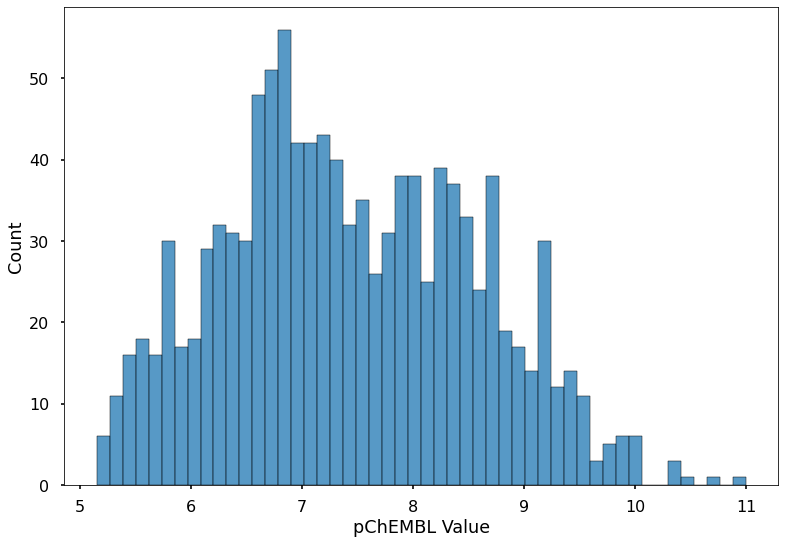

In [28]:
sns.histplot(x = 'pChEMBL Value', data = df, bins = 50)

<AxesSubplot:xlabel='Molecule Max Phase', ylabel='count'>

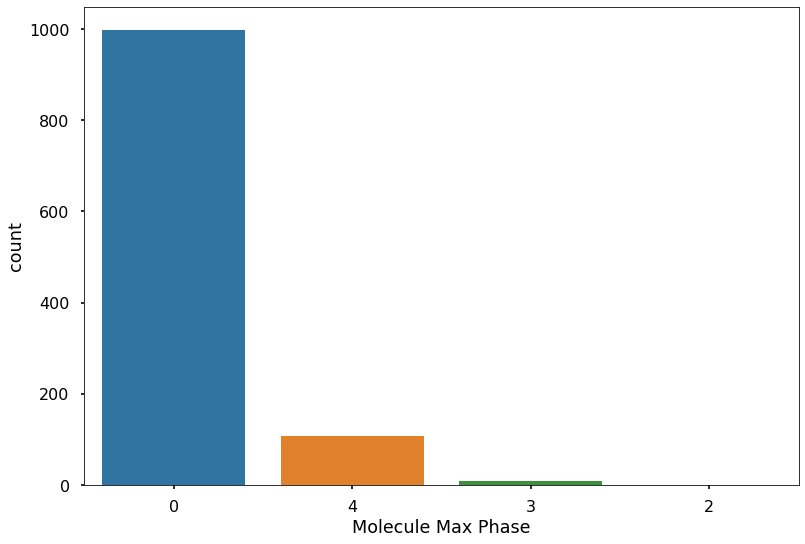

In [29]:
sns.countplot(data = df, x = 'Molecule Max Phase', order = df['Molecule Max Phase'].value_counts().index)

In [30]:
mean=df['pChEMBL Value'].mean()
median=df['pChEMBL Value'].median()
mode=df['pChEMBL Value'].mode().item()

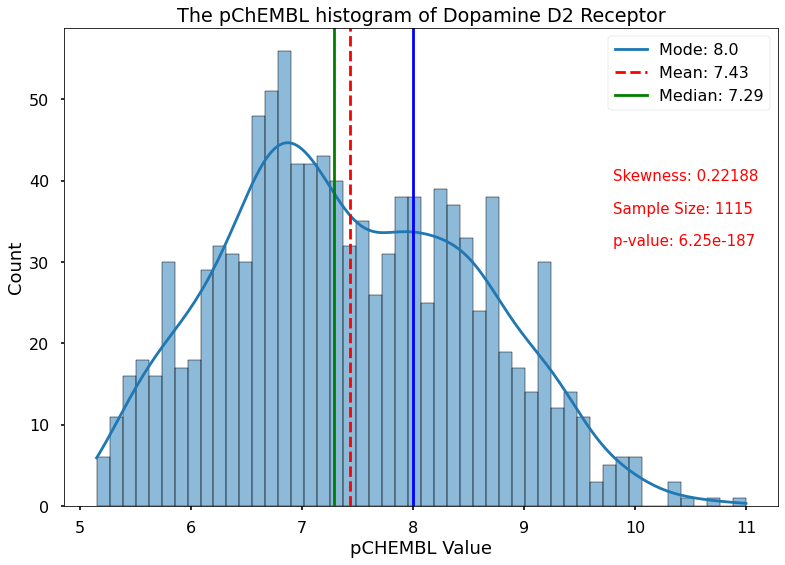

In [31]:
sns.histplot(x='pChEMBL Value', data=df, kde=True,bins=50)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')
plt.legend({'Mode: 8.0':mode,'Mean: 7.43':mean,'Median: 7.29':median})
plt.title('The pChEMBL histogram of Dopamine D2 Receptor')
plt.text(9.8, 40,'Skewness: 0.22188', fontsize=15, color = 'r')
plt.text(9.8, 36,'Sample Size: 1115', fontsize=15, color = 'r')
plt.text(9.8, 32,'p-value: 6.25e-187', fontsize=15, color = 'r')
plt.xlabel('pCHEMBL Value', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show();

In [32]:
from scipy.stats import skew
print('Skewness:', skew(df['pChEMBL Value']))

Skewness: 0.221882816948341


In [31]:
plt.style.use('default')

In [20]:
df.to_excel("Dopamine.xlsx") 